In [5]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 119.1 kB/s eta 0:05:20
   ---------------------------------------- 0.0/38.1 MB 119.1 kB/s eta 0:05:20
   ---------------------------------------- 0.0/38.1 MB 119.1 kB/s eta 0:05:20
   ---------------------------------------- 0.0/38.1 MB 98.1 kB/s eta 0:06:28
   ---------------------------------------- 

In [8]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [14]:
PATH = os.getcwd()
# Define data path
data_path = r"C:\Users\LENOVO\Downloads\archive\data\data"
data_dir_list = os.listdir(data_path)
data_dir_list

['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [15]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=100
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-bike

Loaded the images of dataset-cars

Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-flowers

Loaded the images of dataset-horses

Loaded the images of dataset-human

(1517, 128, 128)


In [17]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

TabError: inconsistent use of tabs and spaces in indentation (3584613825.py, line 3)

In [19]:
if num_channel==1:
	if K.image_data_format()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=3) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(1517, 128, 128, 1)


In [20]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [22]:
Y = utils.to_categorical(labels, num_classes)

In [23]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [24]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1213, 128, 128, 1)
X_test shape = (304, 128, 128, 1)


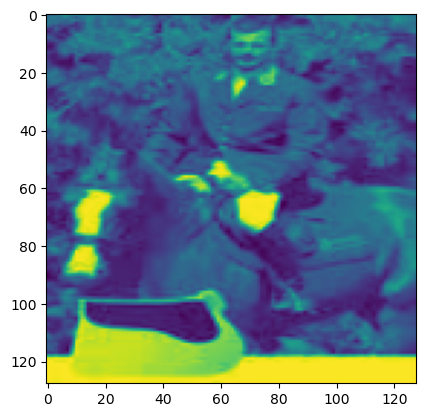

In [25]:
image = X_train[1203,:].reshape((128,128))
plt.imshow(image)
plt.show()

In [27]:
#Initialising the input shape
input_shape=img_data[0].shape
# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(32,3,3, padding ='same',activation='relu',input_shape = input_shape),
    Convolution2D(32,3,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation = 'softmax')
])

In [28]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])

In [30]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               200832    
                                                        

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

hist = cnn_model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)


Epoch 1/100
76/76 [==============================] - 1s 14ms/step - loss: 1.8252 - accuracy: 0.2630 - val_loss: 1.7907 - val_accuracy: 0.2829
Epoch 2/100
76/76 [==============================] - 1s 13ms/step - loss: 1.8322 - accuracy: 0.2465 - val_loss: 1.7897 - val_accuracy: 0.2829
Epoch 3/100
76/76 [==============================] - 1s 13ms/step - loss: 1.8315 - accuracy: 0.2556 - val_loss: 1.7888 - val_accuracy: 0.2829
Epoch 4/100
76/76 [==============================] - 1s 13ms/step - loss: 1.8338 - accuracy: 0.2325 - val_loss: 1.7880 - val_accuracy: 0.2829
Epoch 5/100
76/76 [==============================] - 1s 14ms/step - loss: 1.8213 - accuracy: 0.2539 - val_loss: 1.7870 - val_accuracy: 0.2829
Epoch 6/100
76/76 [==============================] - 1s 13ms/step - loss: 1.8262 - accuracy: 0.2523 - val_loss: 1.7861 - val_accuracy: 0.2796
Epoch 7/100
76/76 [==============================] - 1s 13ms/step - loss: 1.8258 - accuracy: 0.2597 - val_loss: 1.7852 - val_accuracy: 0.2796
Epoch 

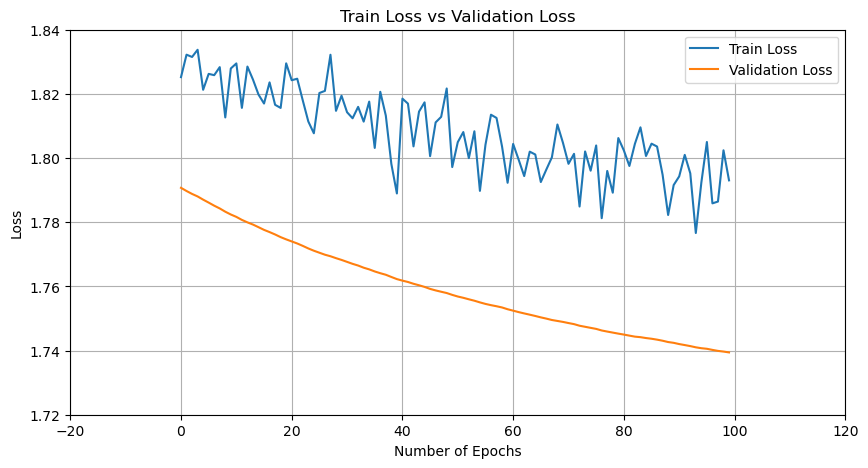

In [45]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])

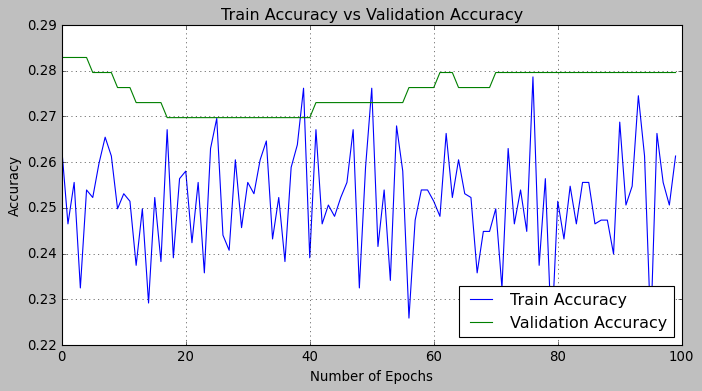

In [46]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

In [47]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.7394202947616577
Test Accuracy: 0.27960526943206787


In [49]:
test_image = X_test[0:1]
print (test_image.shape)
print(cnn_model.predict(test_image))
print(cnn_model.predict(test_image))
print(y_test[0:1])

(1, 128, 128, 1)
1/1 [==============================] - 0s 33ms/step
[[0.2235766  0.12898427 0.24448398 0.11751389 0.16058846 0.08653421
  0.03831857]]
1/1 [==============================] - 0s 25ms/step
[[0.2235766  0.12898427 0.24448398 0.11751389 0.16058846 0.08653421
  0.03831857]]
[[0. 1. 0. 0. 0. 0. 0.]]


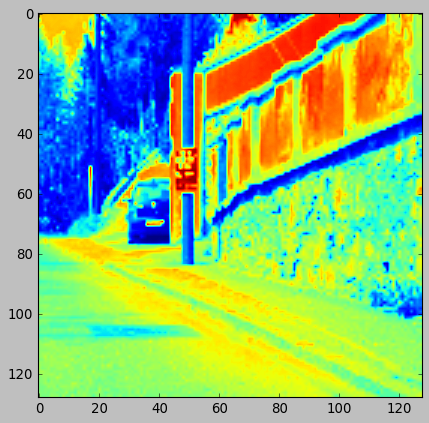

In [50]:
image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

In [53]:
test_img = cv2.imread(r"C:\Users\LENOVO\Downloads\archive\data\human\rider-104.jpg")
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(test_img,(128,128))
test_img = np.array(test_img)
test_img = test_img.astype('float32')
test_img /= 255
print(test_img.shape)

(128, 128)


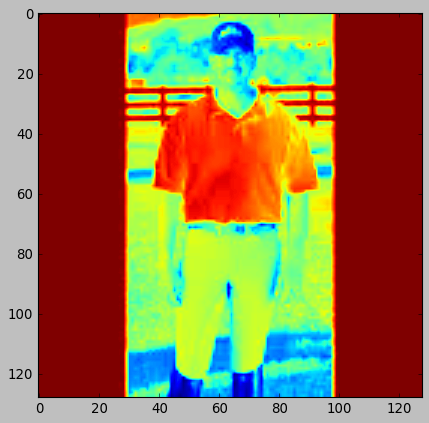

In [54]:
image = test_img.reshape((128,128))
plt.imshow(image)
plt.show()

In [62]:
if num_channel==1:
	if K.image_data_format()=='th':
		test_img= np.expand_dims(test_img, axis=0)
		test_img= np.expand_dims(test_img, axis=0)
		print (test_img.shape)
	else:
		test_img= np.expand_dims(test_img, axis=3) 
		test_img= np.expand_dims(test_img, axis=0)
		print (test_img.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_img=np.rollaxis(test_img,2,0)
		test_img= np.expand_dims(test_img, axis=0)
		print (test_img.shape)
	else:
		test_img= np.expand_dims(test_img, axis=0)
		print (test_img.shape)

(1, 1, 1, 1, 1, 1, 128, 1, 1, 1, 128, 1)


In [70]:
# Print the confusion matrix
Y_pred = cnn_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)
target_names=['Class 1 (bike)', 'Class 2 (cars)', 'Class 3 (cats)', 'Class 4 (dogs)',
              'Class 5 (flowers)', 'Class 6 (horses)']
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_names))

10/10 [==============================] - 0s 8ms/step
[[0.22357662 0.1289843  0.244484   ... 0.16058847 0.08653419 0.03831857]
 [0.2148402  0.13072531 0.24207836 ... 0.16378784 0.09253589 0.04133348]
 [0.21296234 0.13245983 0.23909108 ... 0.16717392 0.08802608 0.03898506]
 ...
 [0.22938688 0.13406216 0.25453246 ... 0.15289672 0.08735487 0.03397715]
 [0.21339332 0.1277176  0.23441628 ... 0.1559616  0.09759995 0.0451855 ]
 [0.21065715 0.1300059  0.24739563 ... 0.15710182 0.09442995 0.04282693]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [71]:
print('Confusion Matrix \n')
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

Confusion Matrix 

[[ 0  0 84  0  0  0]
 [ 2  0 27  0  0  0]
 [ 0  0 85  0  0  0]
 [ 0  0 48  0  0  0]
 [ 0  0 37  0  0  0]
 [ 1  0 20  0  0  0]]


In [72]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix with Normalization")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Confusion matrix without normalization
[[ 0  0 84  0  0  0]
 [ 2  0 27  0  0  0]
 [ 0  0 85  0  0  0]
 [ 0  0 48  0  0  0]
 [ 0  0 37  0  0  0]
 [ 1  0 20  0  0  0]]


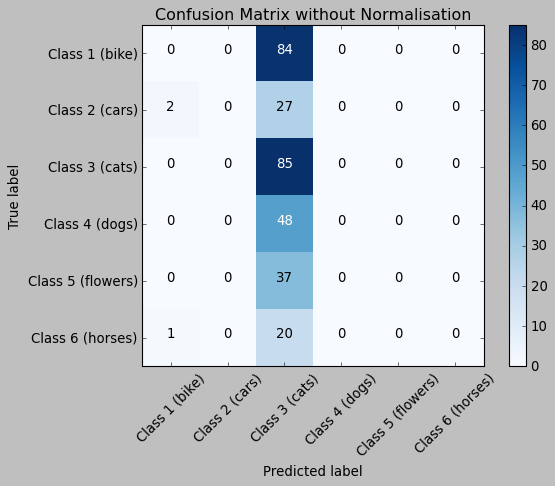

In [73]:
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion Matrix without Normalisation')
plt.show()

Confusion matrix with Normalization
[[0.   0.   1.   0.   0.   0.  ]
 [0.07 0.   0.93 0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.05 0.   0.95 0.   0.   0.  ]]


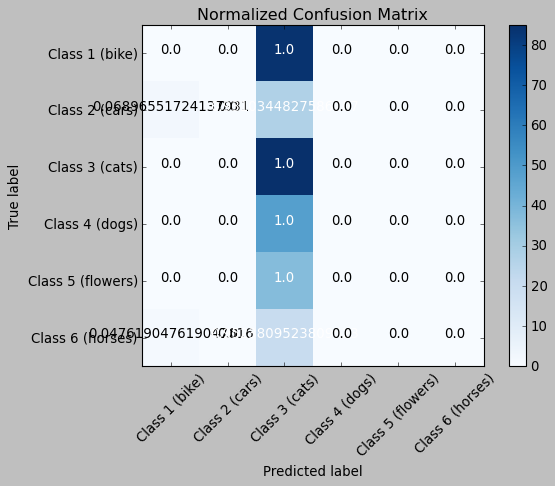

<Figure size 640x480 with 0 Axes>

In [74]:
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized Confusion Matrix')
plt.figure()
plt.show()